### 1.Lectura de base

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Datos_Ob =pd.read_csv('../Datos/ObesityDataSet_raw_and_data_sinthetic.csv')

#Datos_Ob.info()
X = Datos_Ob


In [100]:
Numerica = ["Age","Height","Weight","FCVC","NCP","CH2O","FAF","TUE"]
X_Numerica = X[Numerica]
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


Se presenta el resumen de las variables, en donde se destaca que la edad promedio de los encuestados es de 24 años.

In [43]:
# Exploratory Data Analysis (EDA)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### 2.Matriz de correlación

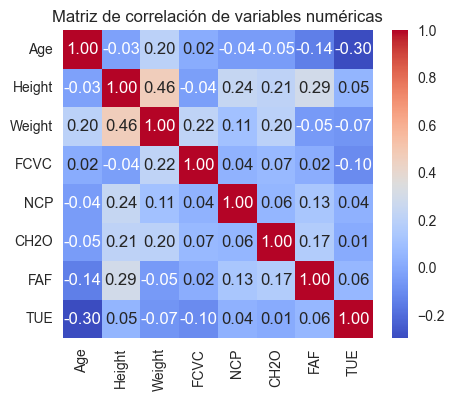

In [50]:
# Plot the correlation matrix as a heatmap
correlation_matrix = X_Numerica.corr()
plt.figure(figsize=(5,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de variables numéricas')
plt.show()

En la anterior gráfica se presenta la matriz de correlación, en donde se pueden observar que la correlación más alta positivamente es la de peso con altura, siendo esta del 0,46. Por el contrario la edad con el tiempo dedicado a manipular dispositivos tecnológicos presenta una correlación negativa del 0,3.

In [49]:
import matplotlib.pyplot as plt

### 3.Análisis descriptivo

In [84]:
def count_values(dataset, cat_variable, order = None):
    """
    """
    ax = sns.countplot(x = cat_variable, data = dataset, palette = "Oranges_r", order = order)
    for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), 
                    ha = "center", va = "top", color = "Black", size = 10)
    
    plt.title(f"Conte de personas por {cat_variable}")
    plt.show()
    

C:\Users\diego\AppData\Local\Temp\ipykernel_328\1446279126.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = cat_variable, data = dataset, palette = "Oranges_r", order = order)


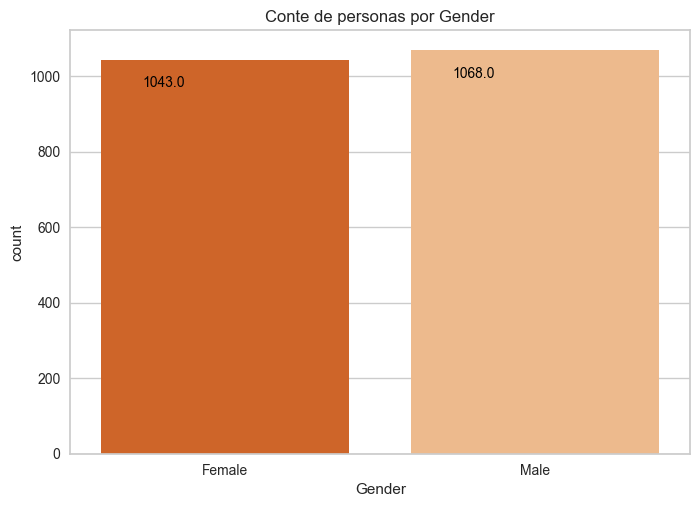

In [85]:
count_values(X, "Gender")

La proporción de personas por género que respondieron la encuesta es similar en hombres y mujeres

C:\Users\diego\AppData\Local\Temp\ipykernel_328\1446279126.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = cat_variable, data = dataset, palette = "Oranges_r", order = order)


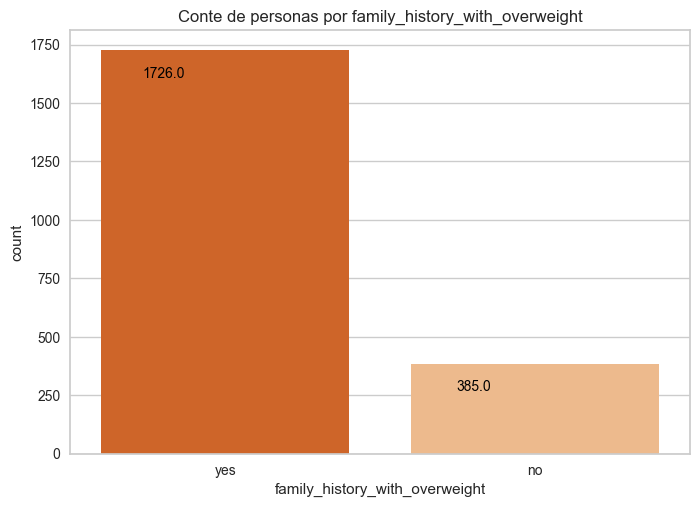

In [86]:
count_values(X, "family_history_with_overweight")

El 82% de las personas encuestadas respondieron que tienen antecedentes de sobrepeso en familiares.

C:\Users\diego\AppData\Local\Temp\ipykernel_328\1446279126.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = cat_variable, data = dataset, palette = "Oranges_r", order = order)


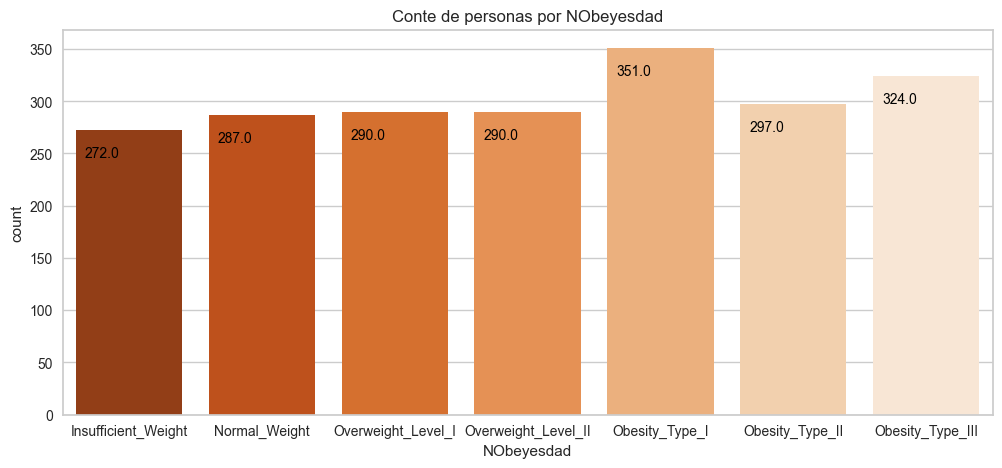

In [88]:
plt.figure(figsize = (12, 5))
count_values(X, "NObeyesdad", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

El nivel de sobrepeso que más predomina en los encuestados corresponde al tipo 1 de obesidad con una participación del 16%, seguido de obesidad tipo 3 y tipo  2 con un 15% y 14% respectivamente. 

In [96]:
def cross_plot(dataset, lead_category, sup_category, order = None):
    """
    Function: Plots interaction between two categorical variables.
    
    Parameters: Dataset, lead category, suplemental category, and order of appearance (order is optional)
    """
    
    sns.countplot(x = lead_category, hue = sup_category, data = dataset, order = order, palette = "Reds_r")
    
    plt.show()

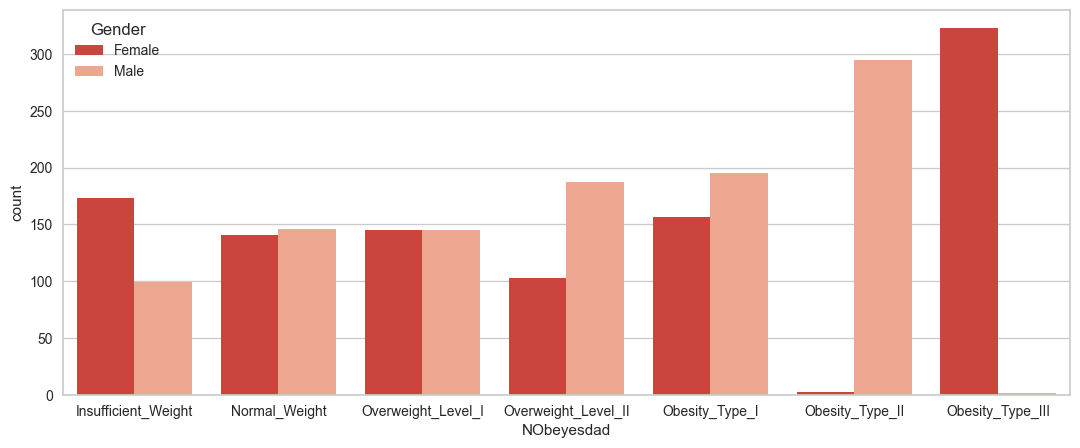

In [97]:
plt.figure(figsize = (13, 5))
cross_plot(X, "NObeyesdad", "Gender", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

La obesidad tipo 3 se caracteriza por predominar el género femenino, mientras que en la obesidad tipo 2 predomina el género masculino.

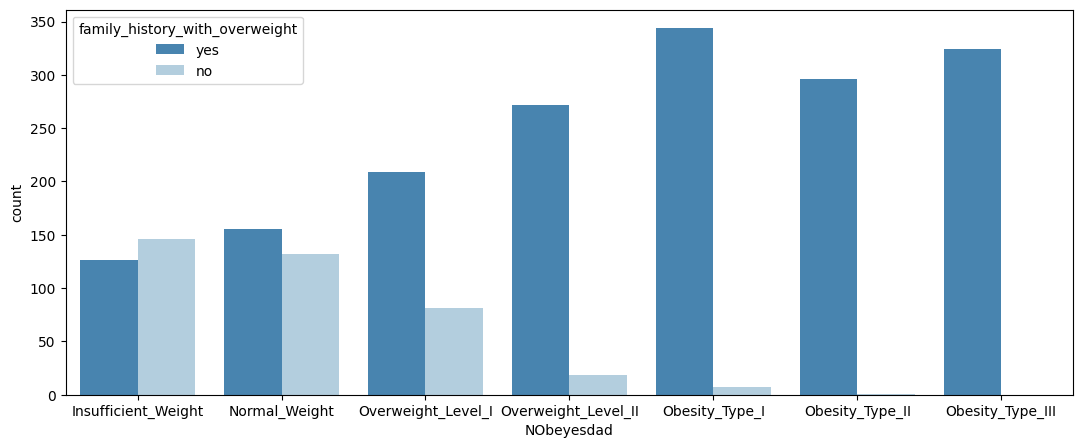

In [15]:
plt.figure(figsize = (13, 5))
cross_plot(X, "NObeyesdad", "family_history_with_overweight", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

Cuando se presenta niveles de sobrepeso en los encuestados, la mayoría han tenido familiares con antecendentes de sobrepeso.

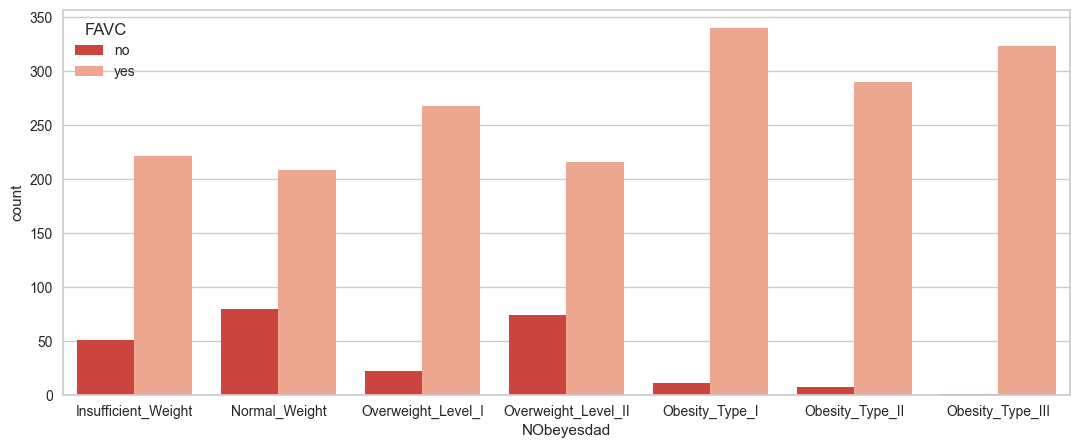

In [98]:
plt.figure(figsize = (13, 5))
cross_plot(X, "NObeyesdad", "FAVC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

Desde los nivles mpas bajos de peso hasta los más altos, se evidencian que consumen alimentos ricos en calorías con frecuencia.

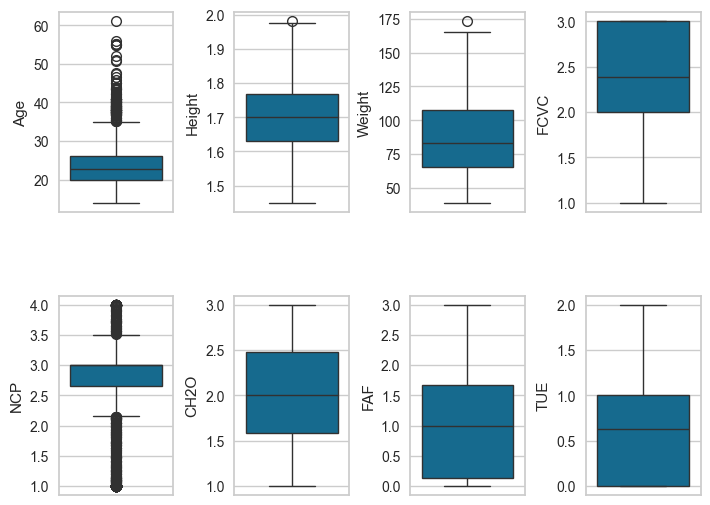

In [102]:
fig, axs = plt.subplots(ncols = 4, nrows = 2, figsize = (7, 5))
# fig.delaxes(axs[1][3])
idx = 0
axs = axs.flatten()
for k, v in X_Numerica.items():
    sns.boxplot(y = k, data = X_Numerica, ax = axs[idx])
    idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

La edad presenta valores atípicos, así como la variable de cuantas comidas principales hace al día. Dado que hay variables que no están en los rangos correctos, se procede a redondear los valores.

In [106]:
X['Age'] = round(X['Age'],0)
X['FCVC'] = round(X['FCVC'],0)
X['NCP'] = round(X['NCP'],0)
X['CH2O'] = round(X['CH2O'],0)
X['FAF'] = round(X['FAF'],0)
X['TUE'] = round(X['TUE'],0)

In [110]:
from sklearn.model_selection import train_test_split

Numerica = ["Age","FCVC","NCP","CH2O","FAF","TUE"]
Categorica = ["Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC","MTRANS"]
Ordinales = ["CAEC", "CALC"]

X_Numerica = X[Numerica]
X_Categorica = X[Categorica]
X_Ordinal = X[Ordinales]

A continuación se realiza el preprocesamiento y transformación de las variables categóricas, numéricas y ordinales.

In [114]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,  OneHotEncoder
#from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


Categorica_trans = OneHotEncoder(handle_unknown='ignore')
Numerical_trans = StandardScaler()
Ordinal_trans = OrdinalEncoder()


Preprocesamiento = ColumnTransformer(
    transformers=[
        ('Categorica', Categorica_trans, Categorica),
        ('Numerica', Numerical_trans, Numerica),
        ('Oridnal', Ordinal_trans, Ordinales)
    ])


In [115]:
Preprocesamiento.fit_transform(X)


array([[ 1.        ,  0.        ,  0.        , ...,  0.49771704,
         2.        ,  3.        ],
       [ 1.        ,  0.        ,  0.        , ..., -0.98629521,
         2.        ,  2.        ],
       [ 0.        ,  1.        ,  0.        , ...,  0.49771704,
         2.        ,  1.        ],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.49771704,
         2.        ,  2.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.49771704,
         2.        ,  2.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.49771704,
         2.        ,  2.        ]])

### 4.Reducción de dimensionalidad y clúster

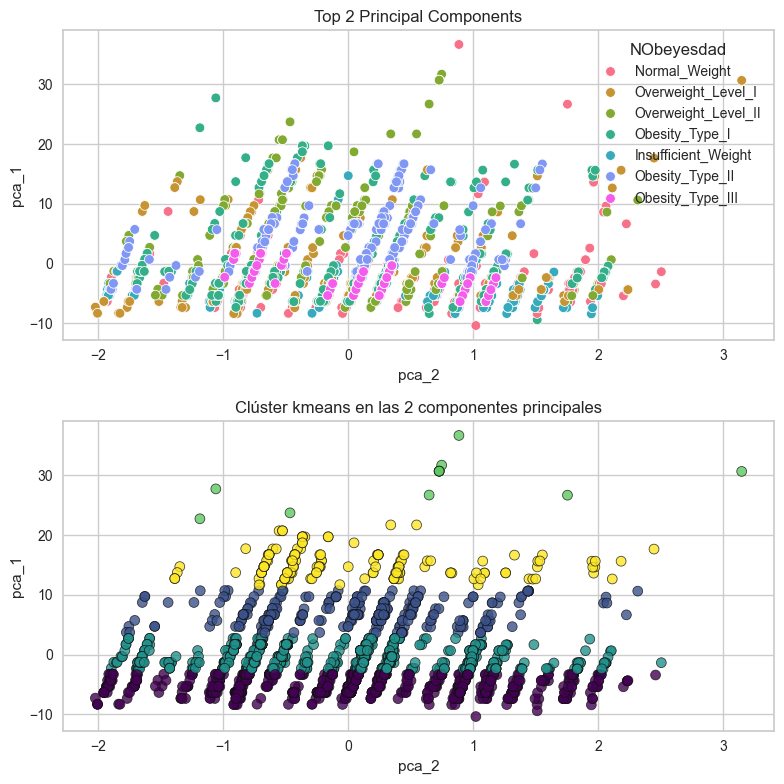

In [153]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#PCA
pca = PCA(n_components=2)
pca_top_2 = pca.fit_transform(X[Numerica])
pca_top_2

tmp = pd.DataFrame(data = pca_top_2, columns = ['pca_1','pca_2'])
tmp['NObeyesdad'] = X["NObeyesdad"]

fig,axs = plt.subplots(2,1,figsize = (8,8))
sns.scatterplot(data=tmp, y="pca_1", x="pca_2", hue='NObeyesdad',ax=axs[0])
axs[0].set_title("Top 2 Principal Components")

#KMeans
kmeans = KMeans(5,random_state=17)
kmeans.fit(tmp[['pca_1','pca_2']])
sns.scatterplot( y= tmp['pca_1'],x = tmp['pca_2'],c = kmeans.labels_,cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.8,ax = axs[1])
axs[1].set_title("Clúster kmeans en las 2 componentes principales")
plt.tight_layout()
plt.show()

Se realiza la reducción de dimensionalidad obteniendo como resultado tomar 2 dimensiones en donde se recogerá el 73% de la inercia total, con lo cual se aplica la metodología de clúster Kmeans teniendo en cuenta el comportamiento de los datos.

In [124]:
pca.singular_values_

array([292.20451555,  42.34740255])

In [125]:
pca.singular_values_.sum()

334.55191809614246

In [133]:
## cantidad de inercia que se recoge en la primer componente
292.204/457.832

0.6382341120760454

In [141]:
## ## cantidad de inercia que se recoge en la segunda componente
42.347/457.832

0.09249462685002359

In [147]:
!pip install yellowbrick

A continuación se presenta el resumen de los componentes componentes principales 

In [149]:
pca = PCA(n_components=2)
pca.fit(X_Numerica)
PCA_ds = pd.DataFrame(pca.transform(X_Numerica), columns=(["col1","col2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2111.0,-1.400217e-15,6.361297,-10.342433,-4.329202,-1.346492,1.718413,36.647820
col2,2111.0,4.039087e-17,0.921904,-2.023741,-0.691645,0.027027,0.713745,3.146498


### Selección de la cantidad de clúster óptimos

Elbow Method to determine the number of clusters to be formed:


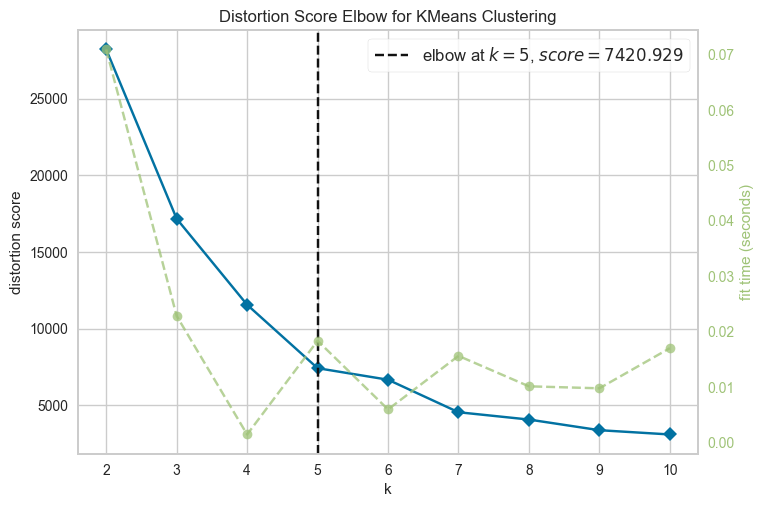

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [150]:
from yellowbrick.cluster import KElbowVisualizer

# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

En la anterior gráfica se puede observar que se seleccionan 5 clúster como el número óptimo a tomar.

### Distribución de los clúster

C:\Users\diego\AppData\Local\Temp\ipykernel_328\3862425095.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=X["Clusters"], palette= pal)
C:\Users\diego\AppData\Local\Temp\ipykernel_328\3862425095.py:11: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x=X["Clusters"], palette= pal)


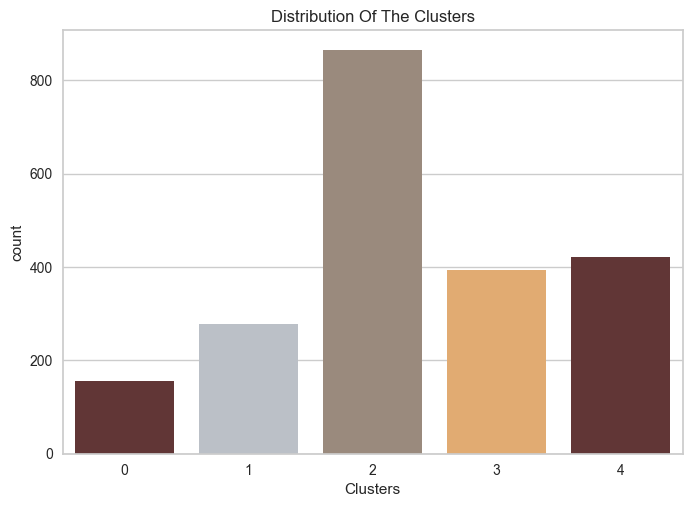

In [156]:
from sklearn.cluster import AgglomerativeClustering
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
X["Clusters"]= yhat_AC

pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=X["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
pca.explained_variance_

array([687.76925528,  38.57180202])

In [ ]:
pca.explained_variance_ratio_

array([0.94393677, 0.05293831])

In [170]:
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
X_Numerica["Clusters"]= yhat_AC

c:\Users\diego\.conda\envs\tensor\lib\site-packages\seaborn\axisgrid.py:1832: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, y=self.y, **kwargs)
c:\Users\diego\.conda\envs\tensor\lib\site-packages\seaborn\axisgrid.py:1883: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
c:\Users\diego\.conda\envs\tensor\lib\site-packages\seaborn\axisgrid.py:1889: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 800x550 with 0 Axes>

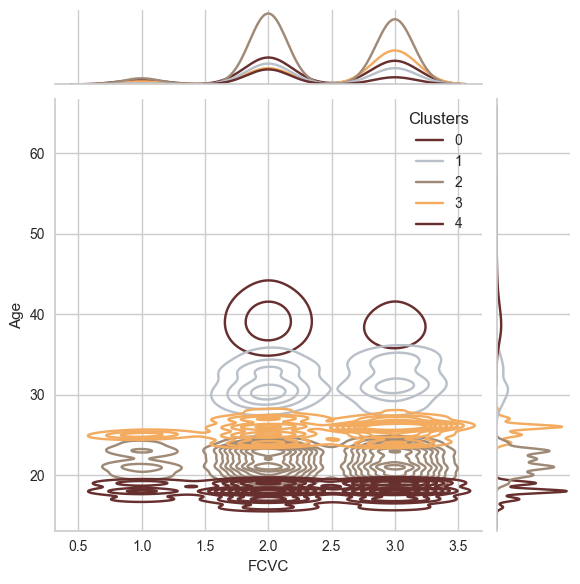

c:\Users\diego\.conda\envs\tensor\lib\site-packages\seaborn\axisgrid.py:1832: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, y=self.y, **kwargs)
c:\Users\diego\.conda\envs\tensor\lib\site-packages\seaborn\axisgrid.py:1883: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
c:\Users\diego\.conda\envs\tensor\lib\site-packages\seaborn\axisgrid.py:1889: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 800x550 with 0 Axes>

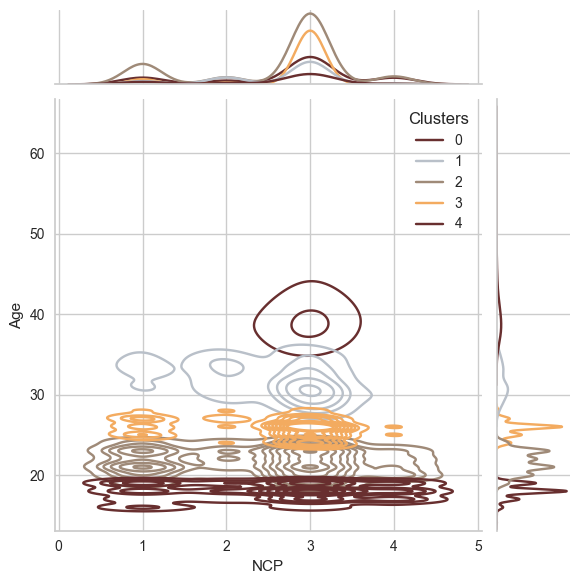

c:\Users\diego\.conda\envs\tensor\lib\site-packages\seaborn\axisgrid.py:1832: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, y=self.y, **kwargs)
c:\Users\diego\.conda\envs\tensor\lib\site-packages\seaborn\axisgrid.py:1883: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
c:\Users\diego\.conda\envs\tensor\lib\site-packages\seaborn\axisgrid.py:1889: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 800x550 with 0 Axes>

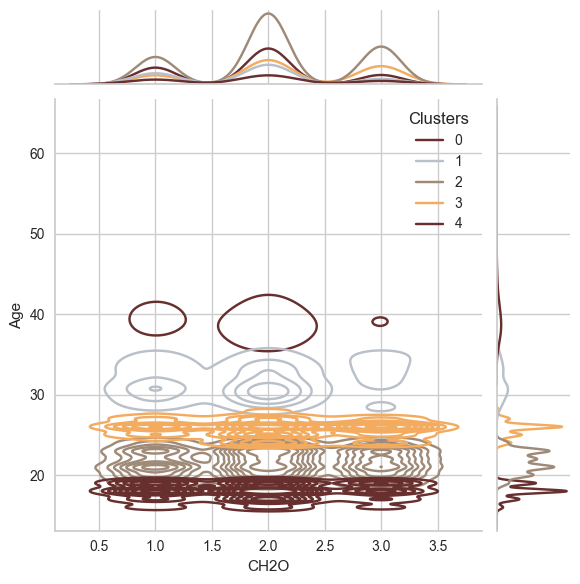

c:\Users\diego\.conda\envs\tensor\lib\site-packages\seaborn\axisgrid.py:1832: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, y=self.y, **kwargs)
c:\Users\diego\.conda\envs\tensor\lib\site-packages\seaborn\axisgrid.py:1883: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
c:\Users\diego\.conda\envs\tensor\lib\site-packages\seaborn\axisgrid.py:1889: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 800x550 with 0 Axes>

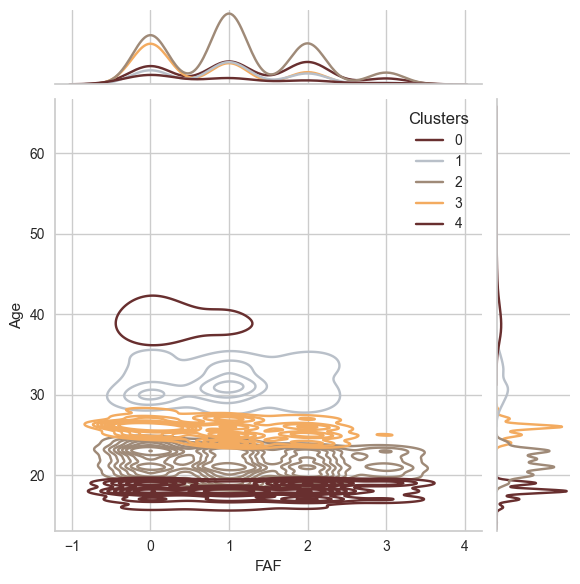

c:\Users\diego\.conda\envs\tensor\lib\site-packages\seaborn\axisgrid.py:1832: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, y=self.y, **kwargs)
c:\Users\diego\.conda\envs\tensor\lib\site-packages\seaborn\axisgrid.py:1883: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
c:\Users\diego\.conda\envs\tensor\lib\site-packages\seaborn\axisgrid.py:1889: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 800x550 with 0 Axes>

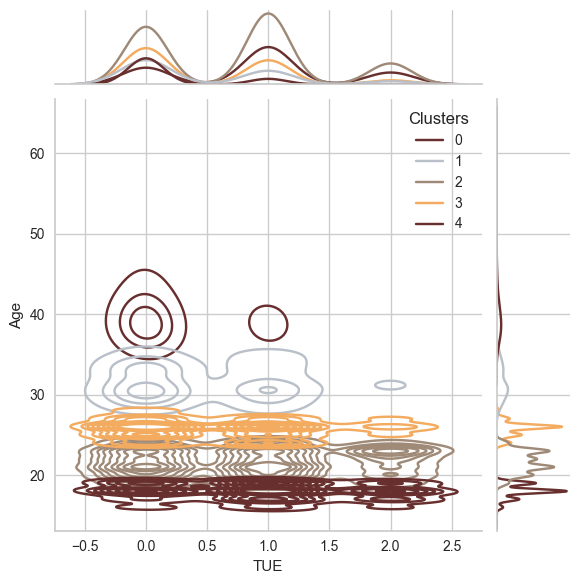

In [173]:
variables = ["FCVC","NCP","CH2O","FAF","TUE"]

for i in variables:
    plt.figure()
    sns.jointplot(x=X_Numerica[i], y=X_Numerica["Age"], hue =X_Numerica["Clusters"], kind="kde", palette=pal)
    plt.show()